# **Football Analysis**

This notebook analyzes football data from the top 5 European leagues (Premier League, La Liga, Bundesliga, Serie A, Ligue 1), as well as the Botola Pro (Morocco), Saudi Professional League, and the FIFA World Cup. The analysis aims to uncover insights, trends, and patterns across these prominent leagues and tournaments through data exploration and statistical techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [2]:
matches_results = pd.read_csv("football_data/clean_matches_results.csv")
matches_statistics = pd.read_csv("football_data/clean_matches_statistics.csv")
goals_df = pd.read_csv("football_data/goals.csv")
injury_time = pd.read_csv("football_data/injury_time.csv")
all_match_data = matches_results.merge(goals_df, on="id", how="left") \
                                .merge(matches_statistics, on="id", how="left")

## **H2H**

In [22]:
from utils.head_to_head import H2H

### Barcelona vs Real Madrid

In [24]:
H2H("Barcelona", "Real Madrid", matches_results, matches_statistics, goals_df)()

,variable,Barcelona,Real Madrid
0,confrontations,27,27
1,wins,12,10
2,draw,5,5
3,goals scored,53,39
4,goal per match,1.96,1.44
5,biggest win,5-0,3-1
6,best goal scorer,Lionel Messi with 10 goals,Cristiano Ronaldo and Karim Benzema with 7 goals
7,average possession,55.86,44.14
8,average shots on target,5.82,5.9


### Manchester City vs Manchester United

In [25]:
H2H("Manchester City", "Manchester United", matches_results, matches_statistics, goals_df)()

,variable,Manchester City,Manchester United
0,confrontations,28,28
1,wins,15,9
2,draw,4,4
3,goals scored,53,32
4,goal per match,1.89,1.14
5,biggest win,6-1,4-2
6,best goal scorer,Sergio Agüero with 7 goals,Anthony Martial and Marcus Rashford with 5 goals
7,average possession,60.12,39.88
8,average shots on target,6.19,4.13


### Raja Club Athletic vs Wydad Casablanca

In [26]:
H2H("Raja Club Athletic", "Wydad Casablanca", matches_results, matches_statistics, goals_df)()

,variable,Raja Club Athletic,Wydad Casablanca
0,confrontations,24,24
1,wins,5,7
2,draw,12,12
3,goals scored,24,23
4,goal per match,1.0,0.96
5,biggest win,3-0,2-0
6,best goal scorer,Mohsine Moutouali and Mouhssine Iajour and Soufiane Rahimi with 2 goals,Arsène Zola and Aymane El Hassouni and Ayoub El Amloud with 2 goals
7,average possession,46.0,54.0
8,average shots on target,2.0,0.0


### Ac Milan vs Inter Milan

In [27]:
H2H("Milan", "Inter", matches_results, matches_statistics, goals_df)()

,variable,Milan,Inter
0,confrontations,27,27
1,wins,7,13
2,draw,7,7
3,goals scored,31,41
4,goal per match,1.15,1.52
5,biggest win,3-0,5-1
6,best goal scorer,Olivier Giroud and Rafael Leão and Suso and Zlatan Ibrahimović with 3 goals,Mauro Icardi with 5 goals
7,average possession,52.55,47.45
8,average shots on target,3.97,5.35


### FC Bayern München vs Borussia Dortmund

In [28]:
H2H("FC Bayern München", "Borussia Dortmund", matches_results, matches_statistics, goals_df)()

,variable,FC Bayern München,Borussia Dortmund
0,confrontations,27,27
1,wins,16,7
2,draw,4,4
3,goals scored,62,31
4,goal per match,2.3,1.15
5,biggest win,6-0,3-0
6,best goal scorer,Robert Lewandowski with 23 goals,Marco Reus with 5 goals
7,average possession,57.71,42.29
8,average shots on target,6.73,3.37


## **The Highest**

### The Highest Scoring Home Team

In [29]:
top_home_scoring = matches_results.groupby("home_team")["home_score"] \
               .sum() \
               .rename("home goals") \
               .reset_index() \
               .sort_values(by="home goals", ascending=False) \
               .head(10)

fig = px.bar(top_home_scoring, x="home_team", y="home goals", color="home_team",
             title="The Highest Scoring Home Team")
fig.show()


### The Highest Scoring Away Team

In [30]:
top_away_scoring = matches_results.groupby("away_team")["away_score"] \
               .sum() \
               .rename("away goals") \
               .reset_index() \
               .sort_values(by="away goals", ascending=False) \
               .head(10)

px.bar(top_away_scoring, x="away_team", y="away goals", color="away_team", title="The Highest Scoring Away Team")


### The Highest Scoring Players

In [31]:
highest_scoring_player = all_match_data.groupby("player.name")["id"] \
                                       .count() \
                                       .rename("total goals") \
                                       .reset_index() \
                                       .sort_values(by="total goals", ascending=False) \
                                       .head(10)


px.bar(highest_scoring_player, x="player.name", y="total goals", color="player.name", title="The Highest 10 scoring players")


### Top 10 Players With Most Assists

In [32]:
highest_scoring_player = all_match_data.groupby("assist.name")["id"] \
                                       .count() \
                                       .rename("total assists") \
                                       .reset_index() \
                                       .sort_values(by="total assists", ascending=False) \
                                       .head(10)


px.bar(highest_scoring_player, x="assist.name", y="total assists", color="assist.name", title="Top 10 Players With Most Assists")

### The Highest Scoring Players in World Cup

In [33]:
highest_scoring_player = all_match_data[all_match_data.tournament == "World Championship"] \
                                       .groupby("player.name")["id"] \
                                       .count() \
                                       .rename("total goals") \
                                       .reset_index() \
                                       .sort_values(by="total goals", ascending=False) \
                                       .head(10)


px.bar(highest_scoring_player, x="player.name", y="total goals", color="player.name", title="The Highest 10 Scoring Players in WC")

## **Before and After**

### VAR

VAR was officially introduced in europes leagues in the 2019-20 season, But it's used in the world cup 2018. Let's see how this technology has changed the football

#### Injury Time

In [34]:
is_world_cup = matches_results['country'] == 'World'
before_var_in_wc = matches_results['season'] < '2018'
season_before_var = matches_results['season'] < '19/20'

matches_results.loc[(is_world_cup & before_var_in_wc) | season_before_var, 'status'] = 'before var'

matches_results.loc[(is_world_cup & ~before_var_in_wc) | ~season_before_var, 'status'] = 'after var'

In [35]:
match_injury_time = matches_results.merge(injury_time, on="id")
injury_time_mean = match_injury_time.groupby("status")["length"] \
                                    .mean() \
                                    .reset_index()

px.bar(injury_time_mean, x="status", y="length", color="status", title="Average Injury Time Before and After VAR")

We notice that additional time has been increased by around 0.8 minutes after introducing VAR across the world

#### Red & Yellow Cards

In [36]:
stats = matches_results.merge(matches_statistics, on="id") \
  .query("(season > '13/14') and (tournament in ['Premier League', 'LaLigua', 'Ligue 1', 'Serie A', 'Bundesligua'])") \
  .fillna(0)

cards_mean = stats.groupby(["status"]) \
    [["home_red_cards", "away_red_cards", "home_yellow_cards", "away_yellow_cards"]] \
    .mean() \
    .reset_index()

cards_mean["average_yellow_cards"] = cards_mean["home_yellow_cards"] + cards_mean["away_yellow_cards"]
cards_mean["average_red_cards"] = cards_mean["home_red_cards"] + cards_mean["away_red_cards"]

px.bar(cards_mean, x="status", y=["average_red_cards", "average_yellow_cards"],
       barmode="group", title="Average Number of Cards Per Match Before & After VAR")

## **Relation Between Stats**

In [37]:
def flatten_df(df, columns, neutral_columns = []):
  away_columns = ["away_" + column for column in columns]
  away_columns.extend(neutral_columns)
  away_stats = stats[away_columns] \
  .dropna() \
  .rename(columns={
      k:v for k,v in zip(away_columns, columns)
  })

  home_columns = ["home_" + column for column in columns]
  home_columns.extend(neutral_columns)
  home_stats = stats[home_columns] \
    .dropna() \
    .rename(columns={
      k:v for k,v in zip(home_columns, columns)
    })

  return pd.concat([away_stats, home_stats])

In [38]:
stats = matches_results.merge(matches_statistics, on="id")

### Goals vs Shots on/off Target vs Ball Possession

<Axes: >

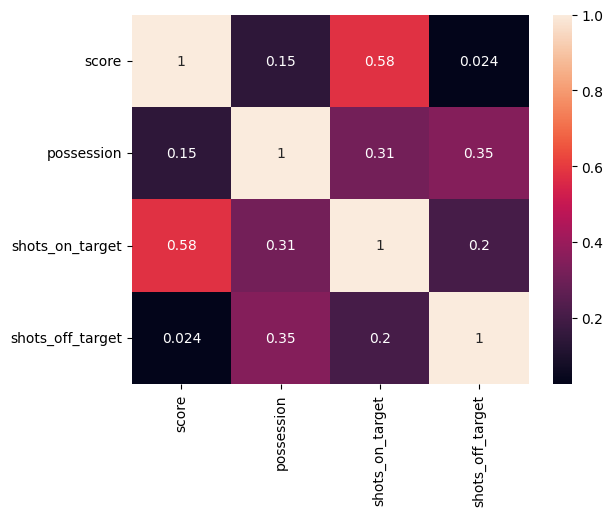

In [39]:
flatten_stats1 = flatten_df(stats, ["score", "possession", "shots_on_target", "shots_off_target"])
sns.heatmap(flatten_stats1.corr(), annot=True)

As we could notice, the correlation between possession, scored goals, shots on target and shots_off_target is not significant.

### Yellow vs Red Cards

In this section we gonna find out if there is an important correlation between the number of red and yellow cards taken by a team in on season.

<Axes: >

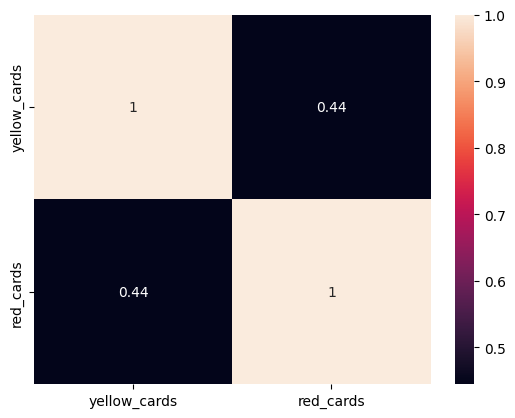

In [40]:
flatten_stats2 = (flatten_df(stats, ["yellow_cards", "red_cards", "team"], ["season"])
                  .groupby(["season", "team"])
                  .sum()
                  .reset_index()
)
flatten_stats2.head()
sns.heatmap(flatten_stats2[["yellow_cards", "red_cards"]].corr(), annot=True)